In [23]:
import duckdb
import matplotlib.pyplot as plt 


with duckdb.connect("data/sakila.duckdb") as conn:
    description = conn.sql("DESC;").df()

description #description of the sakila database after connection to duckdb




,database,schema,name,column_names,column_types,temporary
0,sakila,staging,_dlt_loads,"[load_id, schema_name, status, inserted_at, sc...","[VARCHAR, VARCHAR, BIGINT, TIMESTAMP WITH TIME...",False
1,sakila,staging,_dlt_pipeline_state,"[version, engine_version, pipeline_name, state...","[BIGINT, BIGINT, VARCHAR, VARCHAR, TIMESTAMP W...",False
2,sakila,staging,_dlt_version,"[version, engine_version, inserted_at, schema_...","[BIGINT, BIGINT, TIMESTAMP WITH TIME ZONE, VAR...",False
3,sakila,staging,actor,"[actor_id, first_name, last_name, last_update,...","[DECIMAL(38,9), VARCHAR, VARCHAR, TIMESTAMP, V...",False
4,sakila,staging,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
5,sakila,staging,category,"[category_id, name, last_update, _dlt_load_id,...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
6,sakila,staging,city,"[city_id, city, country_id, last_update, _dlt_...","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, ...",False
7,sakila,staging,country,"[country_id, country, last_update, _dlt_load_i...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
8,sakila,staging,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
9,sakila,staging,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False


In [16]:
##storing the db into a dictionary to make it more developer and user friendly

dfs={}

with duckdb.connect("data/sakila.duckdb")as conn:
    for name in description["name"]:
        if name[0]!= '_':
            dfs[name]= conn.sql(f"FROM staging.{name};").df()


##register the name(table names) to be able to pick out the table and columns during query
            duckdb.register(name,dfs[name])

dfs["category"].head()

,category_id,name,last_update,_dlt_load_id,_dlt_id
0,1,Action,2021-03-06 15:52:00,1765202047.0370784,mM8HaoludwTiXA
1,2,Animation,2021-03-06 15:52:00,1765202047.0370784,TXG8lqm4HezlHg
2,3,Children,2021-03-06 15:52:00,1765202047.0370784,bN33WdhXJ0/s1w
3,4,Classics,2021-03-06 15:52:00,1765202047.0370784,Op+mA2zIgzPNbg
4,5,Comedy,2021-03-06 15:52:00,1765202047.0370784,zimvyFpAZs73xQ


In [17]:
##testing that the register works 
duckdb.sql("DESC;").df()

,database,schema,name,column_names,column_types,temporary
0,temp,main,actor,"[actor_id, first_name, last_name, last_update,...","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP, VARCHAR,...",True
1,temp,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, ""NULL"", VARCHAR, BIGINT, VAR...",True
2,temp,main,category,"[category_id, name, last_update, _dlt_load_id,...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
3,temp,main,city,"[city_id, city, country_id, last_update, _dlt_...","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, ...",True
4,temp,main,country,"[country_id, country, last_update, _dlt_load_i...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
5,temp,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",True
6,temp,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",True
7,temp,main,film_actor,"[actor_id, film_id, last_update, _dlt_load_id,...","[BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
8,temp,main,film_category,"[film_id, category_id, last_update, _dlt_load_...","[BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
9,temp,main,inventory,"[inventory_id, film_id, store_id, last_update,...","[BIGINT, BIGINT, BIGINT, TIMESTAMP, VARCHAR, V...",True


##Movies longer than 180 minutes##

In [ ]:
##use filtering to achieve this
long_movies = duckdb.sql("""
    FROM film
    SELECT title, length
    WHERE length > 180 
    ORDER BY length DESC;
""").df()

long_movies


,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


#Movies with the word "love" in the title

In [22]:
##use filtering to achieve this and allowing anything before and after love using "%" 
love_movies = duckdb.sql("""
    FROM film
    SELECT title,
        rating,
        length,
        description
    WHERE lower(title) LIKE '%love%' 
    ORDER BY title;
""").df()

love_movies

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


#Descriptive statistics for movie length 

In [ ]:
#Use aggregate functions to achieve this/ could also group into keys and values in cases of plotting.  
length_stat = duckdb.sql("""
    FROM film
    SELECT
        MIN(length) AS shortest,
        AVG(length) AS average,
        MEDIAN(length) AS median,
        MAX(length) as longest
""").df()

length_stat

,shortest,average,median,longest
0,46,115.272,114.0,185


In [32]:
duckdb.sql("FROM film;").df()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,_dlt_load_id,_dlt_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,1764948419.3873959,Ewjta6f726CAaQ
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1764948419.3873959,AwnORxiyQ61spA
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00,1764948419.3873959,FrNN7Vg8j6r2zw
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00,1764948419.3873959,iSuGl/prVK4U8Q
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00,1764948419.3873959,PlPWiUe1ygg2BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,<NA>,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08,1764948419.3873959,qe0Gkv2sC9khgg
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,<NA>,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08,1764948419.3873959,J4kenjbLPdAtIA
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,<NA>,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08,1764948419.3873959,g/oseCZLeKsRvg
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,<NA>,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08,1764948419.3873959,XDYko7UTX/ISTQ


#10 most expensive movies to rent per day 

In [36]:
#using the formula rental_rate/ rental_duration to get the most exp per day
dly_most_expensive = duckdb.sql("""
    FROM film
    SELECT
        film_id,
        title,
        rental_rate,
        rental_duration,
        rental_rate / rental_duration AS cost_per_day
    ORDER BY cost_per_day DESC
    
""").df()

dly_most_expensive.head(10) ##limit to top 10

,film_id,title,rental_rate,rental_duration,cost_per_day
0,662,PATHS CONTROL,4.99,3,1.663333
1,48,BACKLASH UNDEFEATED,4.99,3,1.663333
2,65,BEHAVIOR RUNAWAY,4.99,3,1.663333
3,946,VIRTUAL SPOILERS,4.99,3,1.663333
4,878,TEEN APOLLO,4.99,3,1.663333
5,879,TELEGRAPH VOYAGE,4.99,3,1.663333
6,71,BILKO ANONYMOUS,4.99,3,1.663333
7,409,HEARTBREAKERS BRIGHT,4.99,3,1.663333
8,156,CLERKS ANGELS,4.99,3,1.663333
9,889,TIES HUNGER,4.99,3,1.663333


#Top 10 actors by number of movies

In [11]:
## actor and film_actor join to achieve this (pick out actor_id and count film_id using agg.functions)
actor_counts = duckdb.sql("""
    SELECT a.actor_id, a.first_name || ' ' || a.last_name AS actor_name, 
    COUNT(fa.film_id) AS nr_movie_count
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY a.actor_id, actor_name
    ORDER BY nr_movie_count DESC; 

""").df()
actor_counts.head(10) ##limit to top 10



,actor_id,actor_name,nr_movie_count
0,107.0,GINA DEGENERES,42
1,102.0,WALTER TORN,41
2,198.0,MARY KEITEL,40
3,181.0,MATTHEW CARREY,39
4,23.0,SANDRA KILMER,37
5,81.0,SCARLETT DAMON,36
6,158.0,VIVIEN BASINGER,35
7,106.0,GROUCHO DUNST,35
8,37.0,VAL BOLGER,35
9,60.0,HENRY BERRY,35


# Top 12 Customers that have rented the most (count of rentals)

In [54]:
#Join the customer and rental tables to achieve this (pick out cust id and rental id)
top_renters= duckdb.sql("""
    SELECT c.customer_id, c.first_name || ' ' || c.last_name AS customer_name, 
    COUNT(r.rental_id) AS rentals
    FROM customer c
    JOIN rental r ON c.customer_id = r.customer_id
    GROUP BY c.customer_id, customer_name
    ORDER BY rentals DESC;
""").df()

top_renters.head(12) #limit to top 12

,customer_id,customer_name,rentals
0,148,ELEANOR HUNT,46
1,526,KARL SEAL,45
2,144,CLARA SHAW,42
3,236,MARCIA DEAN,42
4,75,TAMMY SANDERS,41
5,469,WESLEY BULL,40
6,197,SUE PETERS,40
7,178,MARION SNYDER,39
8,137,RHONDA KENNEDY,39
9,468,TIM CARY,39


#top 15 Films with the highest replacement cost

In [ ]:
highest_replace_cost=duckdb.sql("""
FROM film 
SELECT title, replacement_cost
ORDER BY replacement_cost DESC;
""").df()

highest_replace_cost.head(15) #limit by 15

,title,replacement_cost
0,FLATLINERS KILLER,29.99
1,HOLLYWOOD ANONYMOUS,29.99
2,LOVER TRUMAN,29.99
3,JINGLE SAGEBRUSH,29.99
4,FLOATS GARDEN,29.99
5,DOCTOR GRAIL,29.99
6,CRUELTY UNFORGIVEN,29.99
7,CUPBOARD SINNERS,29.99
8,QUEST MUSSOLINI,29.99
9,SALUTE APOLLO,29.99


#Top 5 countries with most customers

In [ ]:
#Join customer, country,city, address to achieve this
most_country_customers=duckdb.sql("""

    GROUP BY country
    ORDER BY customer_count    SELECT 
        country,
        COUNT(*) AS customer_count
    FROM customer cu
    JOIN address a ON cu.address_id = a.address_id
    JOIN city ci ON a.city_id = ci.city_id
    JOIN country co ON ci.country_id = co.country_id DESC;
    """).df()

most_country_customers.head(5) #limit to top 5

,country,customer_count
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30


#Top 10 movies by number of rentals

In [ ]:
#Join the film, inventory and rental tables to achieve this 
top_rented_movies= duckdb.sql("""
    SELECT 
        f.title,
        COUNT(*) AS rental_count
    FROM film f
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    GROUP BY f.title
    ORDER BY rental_count DESC;
""").df()

top_rented_movies.head(10) #limit to top 10

,title,rental_count
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,FORWARD TEMPLE,32
3,JUGGLER HARDLY,32
4,SCALAWAG DUCK,32
5,RIDGEMONT SUBMARINE,32
6,GRIT CLOCKWORK,32
7,ROBBERS JOON,31
8,HOBBIT ALIEN,31
9,ZORRO ARK,31


#Top 5 customers by total spend 

In [63]:
#join customer and payment tables to achieve this ,picking out specified rows 
top_customers= duckdb.sql("""
SELECT 
    cu.customer_id,
    cu.first_name || ' ' || cu.last_name AS customer_name,
    SUM(p.amount) AS total_spend
    
FROM customer cu
JOIN payment p ON cu.customer_id = p.customer_id
GROUP BY cu.customer_id, customer_name
ORDER BY total_spend DESC;
""").df()

top_customers.head(5) #limit to top 5

,customer_id,customer_name,total_spend
0,526,KARL SEAL,221.55
1,148,ELEANOR HUNT,216.54
2,144,CLARA SHAW,195.58
3,137,RHONDA KENNEDY,194.61
4,178,MARION SNYDER,194.61


#Plotting a barchart for visual representation

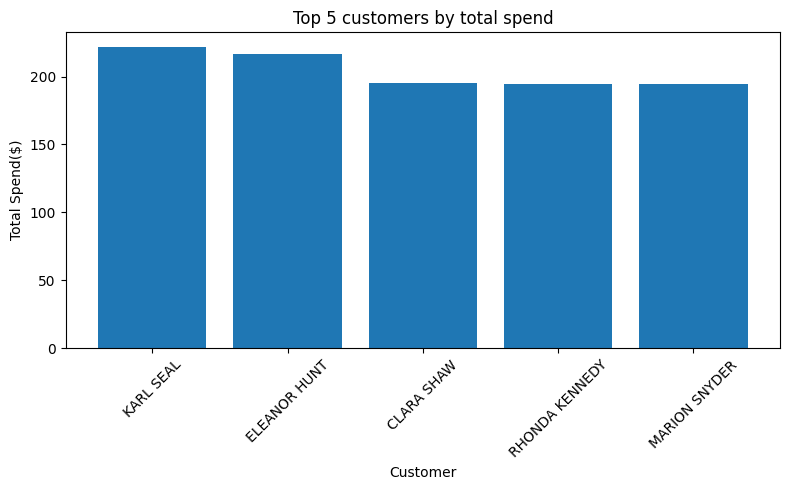

In [62]:
#plotting the bar chart using OOP plot style to show top 5 customers by total spend 
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(top_customers.head(5)["customer_name"], top_customers.head(5)["total_spend"])

ax.set_title("Top 5 customers by total spend")
ax.set_xlabel("Customer")
ax.set_ylabel("Total Spend($)")
ax.tick_params(axis = 'x', rotation=45)

plt.tight_layout()
plt.show()


#Revenue per film category

In [20]:
#join category,film_category, film,inventory,rental and payment tables to achieve this ,picking out specified rows 
revenue_per_film_category= duckdb.sql("""
    SELECT
        c.name AS category,
        SUM(p.amount) AS total_revenue
    FROM category c 
    JOIN film_category fc ON c.category_id = fc.category_id
    JOIN film f ON fc.film_id = f.film_id
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    JOIN payment p ON r.rental_id = p.rental_id
    GROUP BY category
    ORDER BY total_revenue DESC;
""").df()

revenue_per_film_category

,category,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


#Plotting a barchart for visual representation

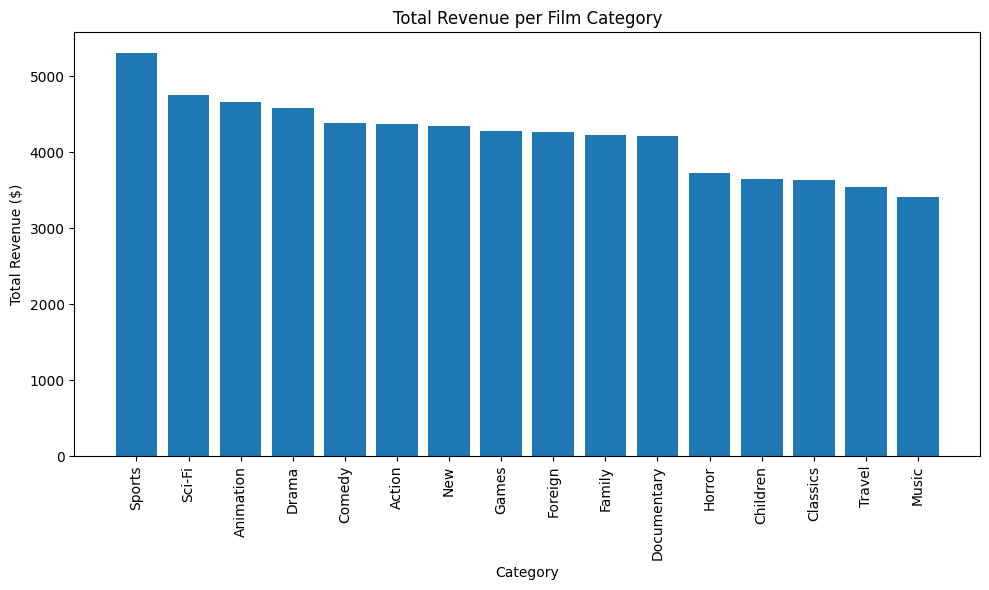

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(revenue_per_film_category["category"], revenue_per_film_category["total_revenue"])

ax.set_title("Total Revenue per Film Category")
ax.set_xlabel("Category")
ax.set_ylabel("Total Revenue ($)")
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()